In [29]:
import numpy as np

import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

In [30]:
# 读取文件原始数据
data = []
labels = []

with open("../synthetic/logs/mu.csv", encoding='UTF-8') as fileObject:
    for line in fileObject:
        line_split = line.split(',')
        features = [line_split[0], line_split[1], line_split[2], line_split[3], line_split[4], line_split[6], line_split[7], line_split[8]]
        data.append(features)
        labels.append([line_split[-2], line_split[-1]])
        # run_labels.append(line_split[-1])

X = []
for row in data:
    row = [float(x) for x in row]
    X.append(row)

y = np.array([[float(x[0]), float(x[1])] for x in labels])


# train cost model
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.1, 
                                                    random_state=0)

# print(type(y_train))

In [31]:
compile_model = xgb.XGBRegressor(n_estimators=200, 
                         learning_rate=0.05, 
                         max_depth=15, 
                         objective='reg:squarederror')
compile_model.fit(X_train, y_train[:, 0])


# 对测试集进行预测
compile_ans = compile_model.predict(X_test)

print(mean_squared_error(y_test[:, 0], compile_ans))

3.9659024405618726


In [32]:
run_model = xgb.XGBRegressor(n_estimators=100, 
                         learning_rate=0.05, 
                         max_depth=10, 
                         objective='reg:squarederror')
run_model.fit(X_train, y_train[:, 1])

run_ans = run_model.predict(X_test)
print(mean_squared_error(y_test[:, 1], run_ans))

117.17216717095481


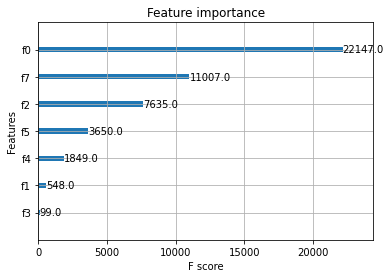

In [33]:
#  显示重要特征
plot_importance(compile_model)
plt.show()

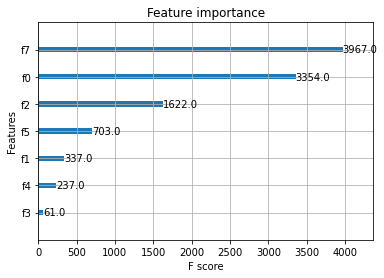

In [34]:
#  显示重要特征
plot_importance(run_model)
plt.show()

In [35]:
neural_sde_test = [[0.000190458,7.5042e-05,0.39400812777620264,0.036624,64,6,128,1]]
neural_sde_label = [2.430105447769165,20.74631690979004]

pred_compile_time1 = compile_model.predict(neural_sde_test)
pred_run_time1 = run_model.predict(neural_sde_test)
print(pred_compile_time1)
print(pred_run_time1)

[1.68163]
[19.506165]


In [39]:
latent_sde_test = [[0.000439754,0.000182594,0.41521850852976894,0.089632,32,6,128,32]]
latent_sde_label = [22.388781785964966,12.347295045852661]

pred_compile_time2 = compile_model.predict(latent_sde_test)
pred_run_time2 = run_model.predict(latent_sde_test)
print(pred_compile_time2)
print(pred_run_time2)

# sde mu sigma
latent_sde_test = [[0.000439754,0.000182594,0.41521850852976894,0.089632,32,6,128,20]]
latent_sde_label = [17.031641244888306,13.110759735107422]
pred_compile_time2 = compile_model.predict(latent_sde_test)
pred_run_time2 = run_model.predict(latent_sde_test)
print(pred_compile_time2)
print(pred_run_time2)

# sde mu sigma
latent_sde_test = [[0.00146643,0.000695362,0.47418697107942426,0.346912,32,6,128,31]]
latent_sde_label = [21.482573986053467,22.15334725379944]
pred_compile_time2 = compile_model.predict(latent_sde_test)
pred_run_time2 = run_model.predict(latent_sde_test)
print(pred_compile_time2)
print(pred_run_time2)

# fbsde
latent_sde_test = [[2.7026e-05,5.399e-06,0.19977059128246877,0.001121,16,4,128,1]]
latent_sde_label = [2.253880023956299,17.312966108322144]
pred_compile_time2 = compile_model.predict(latent_sde_test)
pred_run_time2 = run_model.predict(latent_sde_test)
print(pred_compile_time2)
print(pred_run_time2)

[21.261456]
[17.922543]
[13.282851]
[14.100174]
[22.045391]
[22.487106]
[2.9511864]
[19.460773]


In [37]:
print(y_test[:, 0])
print(y_test[:, 1])

[13.039078   21.93074465  2.34981751  1.19350553  1.27915764  1.19540644
 21.10855842  4.24903226 10.45450139  4.45493841 33.77697301  1.10424948
  1.45637465 19.74155402  9.55447435 36.00845647  1.59087133  1.35268474
  1.23174214 15.5093894   1.39013743  9.98745918  2.99759293  2.30087113
  6.24570394  8.82740259  1.15818214  1.5707705  20.00196362  5.21552706
  2.27069354  4.07148647 35.25535679 21.48257399 17.86886954 15.46092367
  1.85263252 35.14461541  3.4754045  18.62995315  4.41498756  1.68956661
  3.74939108  0.78800249 23.62263107  1.52795172  1.36409211 25.61478138
  9.56006098 10.60192323 10.35458994 10.57886481  6.99135828 14.20672774
  7.1671946  16.75870371  8.83001781  4.45967984 10.20679212  1.1749115
 35.61329627  2.63209295  1.1431582   5.41011524  4.74655652  5.8123982
 10.11259794 12.22671509  6.05461597 37.73341942 21.51194692 10.67767787
 19.90308046 34.58404756  1.54409242]
[15.6849494  13.03404593  6.3199048   9.47989392 22.57146597  9.562711
 12.88394737  6.7

In [38]:
latent_sde_test = [[0.000504926,0.000209794,0.4154945477159029,0.10336,64,6,128,31]]
latent_sde_label = [21.239548444747925,18.208513021469116]

pred_compile_time2 = compile_model.predict(latent_sde_test)
pred_run_time2 = run_model.predict(latent_sde_test)
print(pred_compile_time2)
print(pred_run_time2)

[21.232342]
[17.92159]
